In [6]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib as plt

In [3]:
data = pd.read_csv('C:/Users/ssssa/Desktop/Project/imdb/movie.csv')

In [4]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [5]:
data.shape

(5043, 28)

In [8]:
data['title_year'].head()

0    2009.0
1    2007.0
2    2015.0
3    2012.0
4       NaN
Name: title_year, dtype: float64

In [18]:
data.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [76]:
##a = ['Color' if data['color'].empty() and data['title_year']>1950  else 'Black and White' for x in data['color']]
aa=data.color 
value= ['Color' if x>1950 else 'Black and White' for x in data['title_year']]

In [77]:
data.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [195]:
a=data['director_name']
b=data['imdb_score']

In [218]:
def create_comparison_database(name, value, x, no_films):  
    comparison_df = data.groupby(name, as_index=False)
    if x == 'mean':
        comparison_df = comparison_df.mean()
    elif x == 'median':
        comparison_df = comparison_df.median()
    if x == 'sum':
        comparison_df = comparison_df.sum() 
    # Create database with either name of directors or actors, the value being compared i.e. 'gross',
    # and number of films they're listed with. Then sort by value being compared.
    name_count_key = data[name].value_counts().to_dict()
    comparison_df['films'] = comparison_df[name].map(name_count_key)
    comparison_df.sort_values(value, ascending=False, inplace=True)
    comparison_df[name] = comparison_df[name].map(str) + " (" + comparison_df['films'].astype(str) + ")"
   
    # create a Series with the name as the index so it can be plotted to a subgrid
    comp_series = comparison_df[comparison_df['films'] >= no_films][[name, value]][10::-1].set_index(name).ix[:,0]
    
    return comp_series

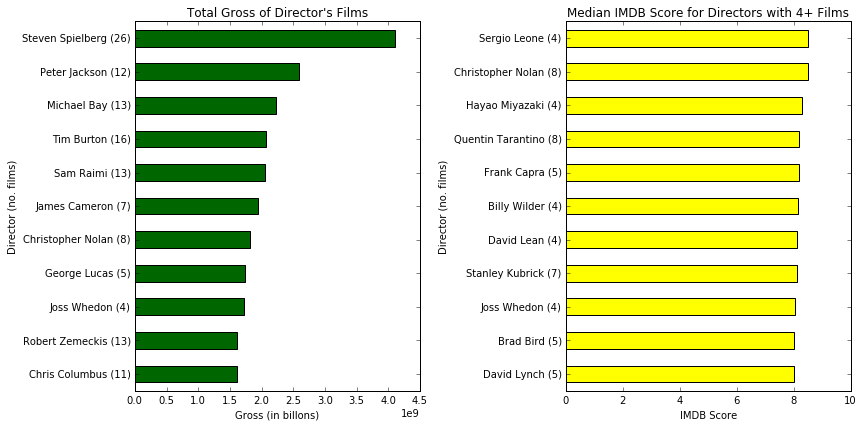

In [219]:
fig = plt.figure(figsize=(18,6))

# Director_name
plt.subplot2grid((2,3),(0,0), rowspan = 2)
create_comparison_database('director_name','gross','sum', 0).plot(kind='barh', color='#006600')
plt.legend().set_visible(False)
plt.title("Total Gross of Director's Films")
plt.ylabel("Director (no. films)")
plt.xlabel("Gross (in billons)")

plt.subplot2grid((2,3),(0,1), rowspan = 2)
create_comparison_database('director_name','imdb_score','median', 4).plot(kind='barh', color='#ffff00')
plt.legend().set_visible(False)
plt.title('Median IMDB Score for Directors with 4+ Films')
plt.ylabel("Director (no. films)")
plt.xlabel("IMDB Score")
plt.xlim(0,10)

plt.tight_layout()

In [226]:
ab= data.groupby('director_name')['gross'].sum()
ab.sort_values(ascending=False).head(10)


director_name
Steven Spielberg     4.114233e+09
Peter Jackson        2.592969e+09
Michael Bay          2.231243e+09
Tim Burton           2.071275e+09
Sam Raimi            2.049549e+09
James Cameron        1.948126e+09
Christopher Nolan    1.813228e+09
George Lucas         1.741418e+09
Joss Whedon          1.730887e+09
Robert Zemeckis      1.619309e+09
Name: gross, dtype: float64

In [241]:
a= data[data['imdb_score']>9.2]
a

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,...,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000
2765,Color,John Blanchard,NaN,65.0,0.0,176.0,Andrea Martin,770.0,NaN,Comedy,...,NaN,English,Canada,NaN,NaN,NaN,179.0,9.5,1.33,0


In [286]:
## Total movies 
b= np.sum(data['imdb_score']>9.2)
print b

2


In [287]:
## Finding the movies between the range of 2 and 10 
e=data.where(np.logical_and(data['imdb_score']>=2,data['imdb_score']<10))
e.dropna(inplace=True)
e.shape

(3753, 28)

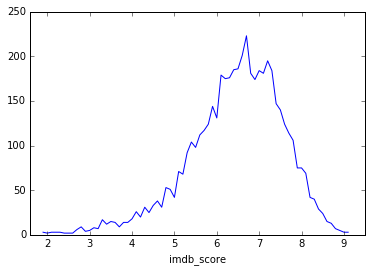

In [296]:
##Count of movies having IMDB rating between 2 and 9
totalmovie_imdb = data.groupby('imdb_score')['movie_title'].count()
data_group_a = totalmovie_imdb.where(data_group>=2)
data_group_a.plot()

In [297]:
total_movie_year= data.groupby('title_year')['movie_title'].count()

In [299]:
total_movie_year.head()

title_year
1916.0    1
1920.0    1
1925.0    1
1927.0    1
1929.0    2
Name: movie_title, dtype: int64

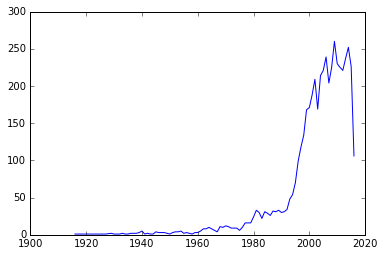

In [300]:
plt.plot(total_movie_year)

In [275]:
e['director_name'].drop_duplicates().head()

3     Christopher Nolan
17          Joss Whedon
27        Anthony Russo
43          Lee Unkrich
58       Andrew Stanton
Name: director_name, dtype: object

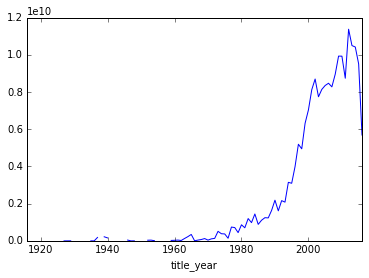

In [308]:
total_gross = data.groupby(['title_year'])['gross'].sum()  
total_gross.plot()

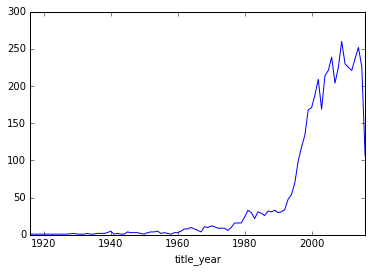

In [315]:
total_movies_peryear= data.groupby(['title_year'])['movie_title'].count()
total_movies_peryear.plot()

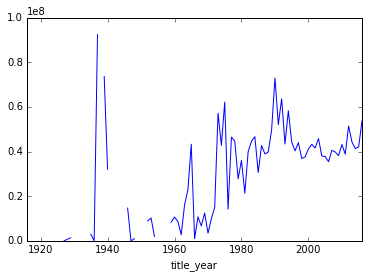

In [321]:
#x= total_gross.map(total_movies_peryear)
avg_turn=total_gross/total_movies_peryear
avg_turn.plot()

In [328]:
avg_turn.head()

title_year
1916.0          NaN
1920.0    3000000.0
1925.0          NaN
1927.0      26435.0
1929.0    1408975.0
dtype: float64

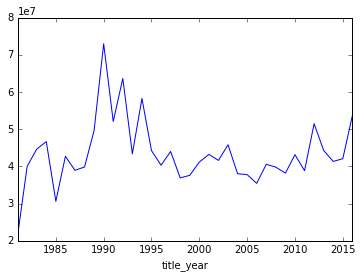

In [337]:
avg_turn_after1980 = avg_turn[avg_turn.index>1980]
avg_turn_after1980.plot()

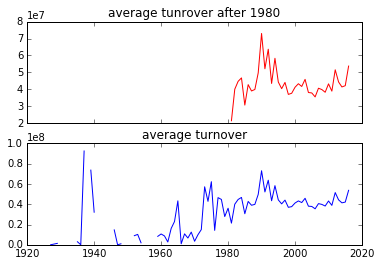

In [341]:
#Compairing both graphs for same years
f,g = plt.subplots(2, sharex=True)
g[0].plot(avg_turn_after1980,'r')
g[0].set_title('average tunrover after 1980')
g[1].plot(avg_turn)
g[1].set_title('average turnover')

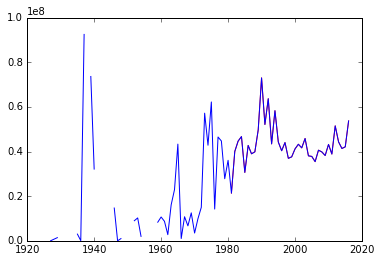

In [344]:
plt.plot(avg_turn_after1980,'r')
plt.plot(avg_turn)

In [370]:
#Sorting the data with IMDB sccore
Highest_score= data.sort_values(by='imdb_score', ascending= False)
Highest_score.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2765,Color,John Blanchard,NaN,65.0,0.0,176.0,Andrea Martin,770.0,NaN,Comedy,...,NaN,English,Canada,NaN,NaN,NaN,179.0,9.5,1.33,0
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,...,4144.0,English,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,...,2238.0,English,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000
4409,NaN,John Stockwell,2.0,90.0,134.0,354.0,T.J. Storm,260000.0,NaN,Action,...,1.0,NaN,USA,NaN,17000000.0,2016.0,454.0,9.1,NaN,0
2824,Color,NaN,53.0,55.0,NaN,2.0,Olaf Lubaszenko,20.0,447093.0,Drama,...,37.0,Polish,Poland,TV-MA,NaN,NaN,3.0,9.1,1.33,0


In [380]:
#Show top - 2 movies in each group
top_mov = Highest_score.groupby('imdb_score')['movie_title'].apply(lambda x :x.head(2))
print top_mov.head(7)
top_mov1=top_mov.reset_index()
top_mov1.head(7)

imdb_score      
1.6         2834    Justin Bieber: Never Say Never 
1.7         1136                        Foodfight! 
1.9         2268                    Disaster Movie 
            2295      Superbabies: Baby Geniuses 2 
2.0         1729                   United Passions 
            3505                 Who's Your Caddy? 
2.1         2983              From Justin to Kelly 
dtype: object


,imdb_score,level_1,0
0,1.6,2834,Justin Bieber: Never Say Never
1,1.7,1136,Foodfight!
2,1.9,2268,Disaster Movie
3,1.9,2295,Superbabies: Baby Geniuses 2
4,2.0,1729,United Passions
5,2.0,3505,Who's Your Caddy?
6,2.1,2983,From Justin to Kelly


In [385]:
top_grossing_Actor= data.groupby('actor_1_name')['gross'].mean()
top_grossing_Actor_Sort = top_grossing_Actor.sort_values(ascending =False)
top_grossing_Actor_Sort.head(5)

actor_1_name
Rupert Everett    436471036.0
Wayne Knight      356784000.0
Albert Finney     304360277.0
Steve Bastoni     281492479.0
Phaldut Sharma    274084951.0
Name: gross, dtype: float64

In [454]:
score= data.where(data['imdb_score']>8.5)
aa = score.sort_values(by='imdb_score', ascending= False)
#these 2 lines can be written as combined 
#score1= data[data['imdb_score']>8].sort_values(by = 'imdb_score', ascending = False)
aa= aa.dropna()
aa= pd.DataFrame(aa)


In [455]:
aa.loc[:,['movie_title', 'director_name', 'gross', 'actor_1_name','imdb_score' ]].head(10)

,movie_title,director_name,gross,actor_1_name,imdb_score
1937,The Shawshank Redemption,Frank Darabont,28341469.0,Morgan Freeman,9.3
3466,The Godfather,Francis Ford Coppola,134821952.0,Al Pacino,9.2
2837,The Godfather: Part II,Francis Ford Coppola,57300000.0,Robert De Niro,9.0
66,The Dark Knight,Christopher Nolan,533316061.0,Christian Bale,9.0
3355,Pulp Fiction,Quentin Tarantino,107930000.0,Bruce Willis,8.9
339,The Lord of the Rings: The Return of the King,Peter Jackson,377019252.0,Orlando Bloom,8.9
4498,"The Good, the Bad and the Ugly",Sergio Leone,6100000.0,Clint Eastwood,8.9
1874,Schindler's List,Steven Spielberg,96067179.0,Liam Neeson,8.9
683,Fight Club,David Fincher,37023395.0,Brad Pitt,8.8
270,The Lord of the Rings: The Fellowship of the R...,Peter Jackson,313837577.0,Christopher Lee,8.8


In [456]:
df_top_grossing_actors = aa.groupby('actor_1_name')['gross'].mean()
df_top_grossing_actors.sort_values(ascending=False).head()

actor_1_name
Christian Bale       533316061.0
Orlando Bloom        377019252.0
Harrison Ford        375547208.0
Christopher Lee      327158237.5
Leonardo DiCaprio    292568851.0
Name: gross, dtype: float64

In [457]:
topactor=aa['actor_1_name']
list(topactor)

['Morgan Freeman',
 'Al Pacino',
 'Robert De Niro',
 'Christian Bale',
 'Bruce Willis',
 'Orlando Bloom',
 'Clint Eastwood',
 'Liam Neeson',
 'Brad Pitt',
 'Christopher Lee',
 'Harrison Ford',
 'Leonardo DiCaprio',
 'Tom Hanks',
 'Alice Braga',
 'Scatman Crothers',
 'Takashi Shimura',
 'Keanu Reeves',
 'Christopher Lee',
 'Harrison Ford',
 'Robert De Niro',
 'Morgan Freeman',
 'Paulette Goddard',
 'Tom Hanks',
 'Ethan Suplee',
 'Anthony Hopkins',
 'Bunta Sugawara',
 'Kevin Spacey',
 'Matthew McConaughey']

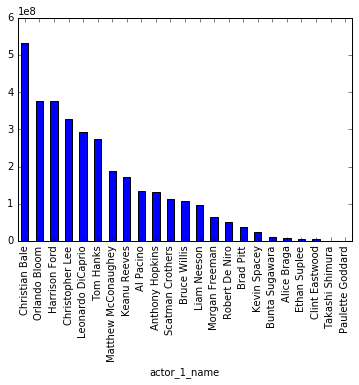

In [469]:
res= df_top_grossing_actors[df_top_grossing_actors.index.isin(topactor)]
res= res.sort_values(ascending=False)
res.plot('bar')

In [470]:
import seaborn as sns

In [540]:
data['diff_gross']=data['gross']-data['budget']
data_copy = data.copy().dropna()
df_copy=data_copy
director_budge= df_copy.groupby(df_copy['director_name'])['diff_gross'].sum()
direcotr_budge_indx= director_budge.sort_values(ascending= False)[:30].index
director_budge_pivot= pd.pivot_table(data=df_copy[df_copy['director_name'].isin(direcotr_budge_indx)],
                          index=['title_year'], 
                          columns=['director_name'], 
                          values= ['diff_gross'],
                          aggfunc='sum')
director_budge_pivot.head()

diff_gross                                                  \
director_name Andrew Adamson Chris Columbus Christopher Nolan Clint Eastwood   
title_year                                                                     
1973.0                   NaN            NaN               NaN            NaN   
1975.0                   NaN            NaN               NaN            NaN   
1977.0                   NaN            NaN               NaN            NaN   
1981.0                   NaN            NaN               NaN            NaN   
1982.0                   NaN            NaN               NaN     25700000.0   

                                                                            \
director_name Colin Trevorrow Francis Lawrence Garry Marshall George Lucas   
title_year                                                                   
1973.0                    NaN              NaN            NaN  114223000.0   
1975.0                    NaN              NaN            NaN          NaN   
1977.0                    NaN              NaN            NaN  449935665.0   
1981.0                    NaN              NaN            NaN          NaN   
1982.0                    NaN              NaN            NaN          NaN   

                                          ...                              \
director_name James Cameron James Wan     ...     Rawson Marshall Thurber   
title_year                                ...                               
1973.0                  NaN       NaN     ...                         NaN   
1975.0                  NaN       NaN     ...                         NaN   
1977.0                  NaN       NaN     ...                         NaN   
1981.0                  NaN       NaN     ...                         NaN   
1982.0                  NaN       NaN     ...                         NaN   

                                                                 \
director_name Robert Zemeckis Roger Allers Sam Raimi Shawn Levy   
title_year                                                        
1973.0                    NaN          NaN       NaN        NaN   
1975.0                    NaN          NaN       NaN        NaN   
1977.0                    NaN          NaN       NaN        NaN   
1981.0                    NaN          NaN       NaN        NaN   
1982.0                    NaN          NaN       NaN        NaN   

                                                                           \
director_name Steven Soderbergh Steven Spielberg Tim Burton Todd Phillips   
title_year                                                                  
1973.0                      NaN              NaN        NaN           NaN   
1975.0                      NaN      252000000.0        NaN           NaN   
1977.0                      NaN      108899130.0        NaN           NaN   
1981.0                      NaN      224374454.0        NaN           NaN   
1982.0                      NaN      424449459.0        NaN           NaN   

                           
director_name Tom Shadyac  
title_year                 
1973.0                NaN  
1975.0                NaN  
1977.0                NaN  
1981.0                NaN  
1982.0                NaN  

[5 rows x 30 columns]

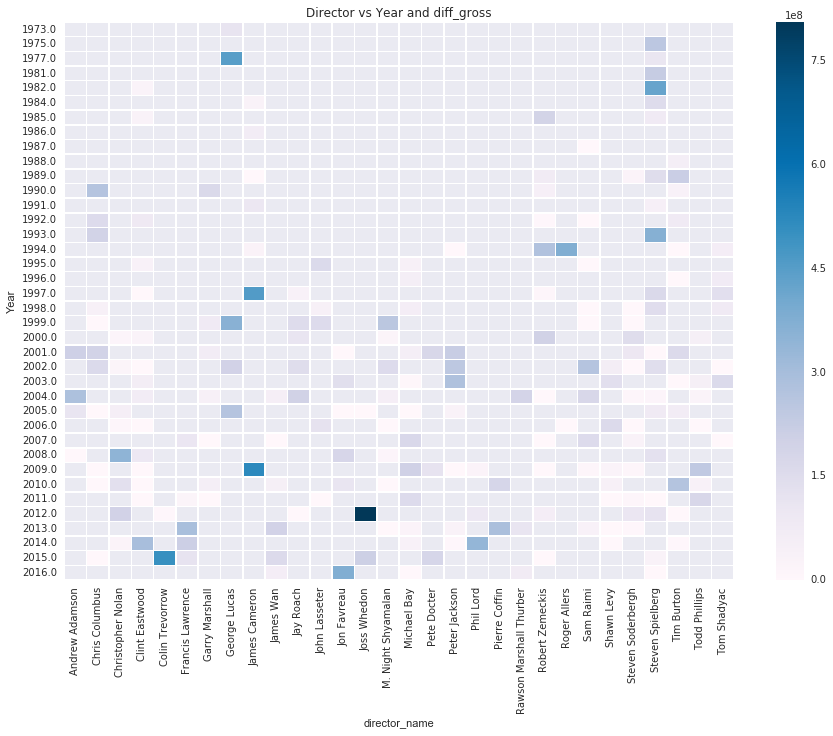

In [541]:
a,b = plt.subplots(figsize=(15,10))
sns.heatmap(director_budge_pivot['diff_gross'],vmin=0,annot=False,linewidth=.5,cmap='PuBu')
plt.title('Director vs Year and diff_gross')
plt.ylabel('Year')

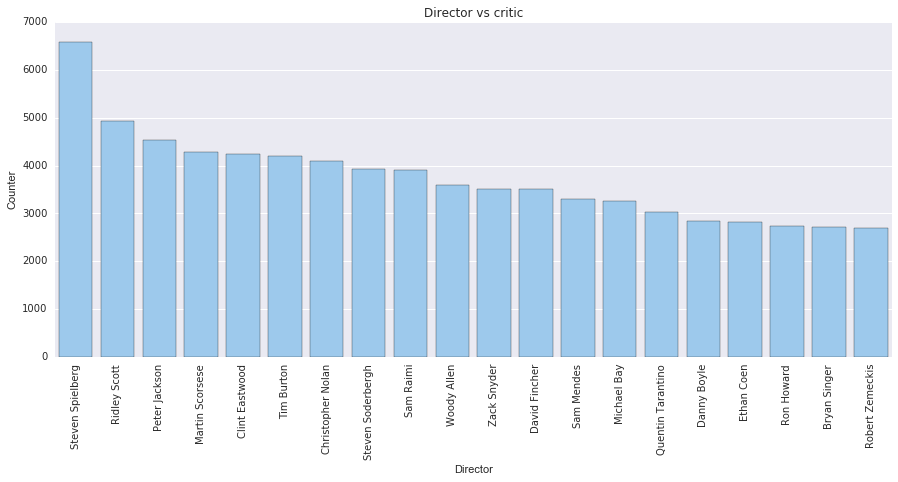

In [556]:
data['num_critic_for_reviews'].head()
num_critic_for_reviews= data.groupby('director_name')['num_critic_for_reviews'].sum()
num_critic_for_reviews= num_critic_for_reviews.dropna()
num_critic_for_reviews_index= num_critic_for_reviews.sort_values(ascending=False)[:20].index
num_critic_for_reviews_value= num_critic_for_reviews.sort_values(ascending=False)[:20].values
a,ax = plt.subplots(figsize=(15,6))
sns.barplot(x= num_critic_for_reviews_index,
            y= num_critic_for_reviews_value,
            color='#90caf9',ax=ax)    
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Director vs critic')
plt.ylabel('Counter')
plt.xlabel('Director')                   

In [562]:
data_country= data.groupby('country')['diff_gross'].sum()
data_country= data_country.dropna()
diff_gross_country_index=data_country.sort_values(ascending= False)[:20].index
pivot_country=pd.pivot_table(data=data[data['country'].isin(diff_gross_country_index)],
                            index=['title_year'], 
                            columns=['country'], 
                            values= ['diff_gross'],
                            aggfunc='sum')

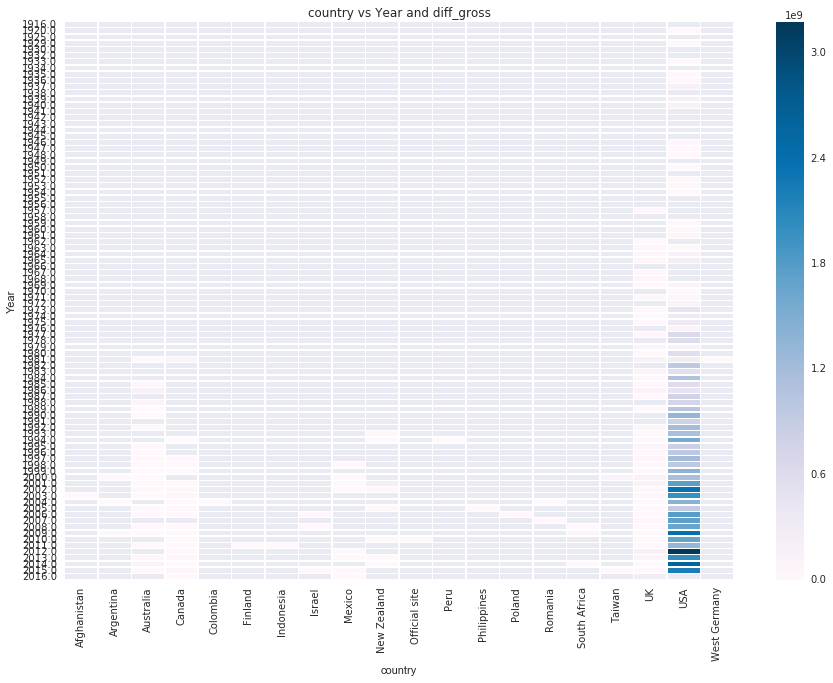

In [563]:
a, ax= plt.subplots(figsize=(15,10))
sns.heatmap(pivot_country['diff_gross'],vmin=0,annot=False,linewidth=.5,cmap='PuBu' )
plt.title('country vs Year and diff_gross')
plt.ylabel('Year')

In [565]:
data['genres'].head(10)

0                      Action|Adventure|Fantasy|Sci-Fi
1                             Action|Adventure|Fantasy
2                            Action|Adventure|Thriller
3                                      Action|Thriller
4                                          Documentary
5                              Action|Adventure|Sci-Fi
6                             Action|Adventure|Romance
7    Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                              Action|Adventure|Sci-Fi
9                     Adventure|Family|Fantasy|Mystery
Name: genres, dtype: object

In [572]:
a= data['genres'].map(lambda x:x.split('|'))
data_copy['new']=a

# same can be written without using lambda as
#def process_genre(genres):
#    genre_list = []
#    for genre in genres.split('|'):
#        genre_list.append(genre)
#    return genre_list
#data_copy['genre_list'] = data_copy['genres'].map(process_genre)

data_copy = data_copy.reset_index(drop=True)
data_copy.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,diff_gross,genre_list,new
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,"[Action, Adventure, Fantasy, Sci-Fi]","[Action, Adventure, Fantasy, Sci-Fi]"
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,"[Action, Adventure, Fantasy]","[Action, Adventure, Fantasy]"
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,"[Action, Adventure, Thriller]","[Action, Adventure, Thriller]"
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,"[Action, Thriller]","[Action, Thriller]"
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,"[Action, Adventure, Sci-Fi]","[Action, Adventure, Sci-Fi]"


In [579]:
from collections import Counter
total_genre_list = []
for idx in range(len(df_copy)):
    for genre in data_copy['genre_list'][idx]:
        total_genre_list.append(genre)
genre_counter =Counter(total_genre_list)       


In [ ]:
genre_counter_indx = np.asarray(list(genre_counter.keys()))
genre_counter_val = np.asarray(list(genre_counter.values()))        


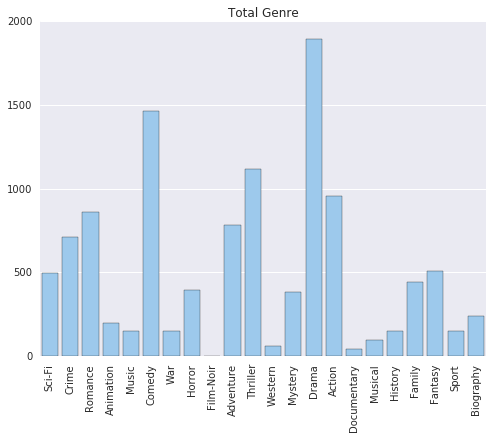

In [580]:
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = genre_counter_indx, y = genre_counter_val,color='#90caf9',ax=ax)
plt.title('Total Genre')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
del fig,ax,ticks